In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv('./datasets/train.csv')
train_data.shape

(69999, 172)

In [3]:
train_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
# query columns that have nulls above threshold >20 perc

def getPerctNULLValues(column):
    return (train_data[column].isnull().sum()/len(train_data))*100

null_columns=[column for column in train_data.columns if getPerctNULLValues(column)>20]

# get unique columns that have nulls
unique_columns_nulls=[column[:-2] for column in null_columns]
unique_null_columns=pd.DataFrame(unique_columns_nulls)[0].unique()

In [5]:
#percentage of null values in remaining columns (>20 perc)
columns_with_nulls_above_th=[(column,getPerctNULLValues(column),train_data[column].isnull().sum(), train_data[column].nunique()) 
            for column in train_data.columns if getPerctNULLValues(column)>20]

df_nulls=pd.DataFrame(columns_with_nulls_above_th, columns=['Attribute','Null%','No Of Null Rows','Unique Values'])
df_nulls.sort_values(['No Of Null Rows'], ascending=False)

,Attribute,Null%,No Of Null Rows,Unique Values
0,date_of_last_rech_data_6,74.902499,52431,30
9,count_rech_2g_6,74.902499,52431,30
27,fb_user_6,74.902499,52431,2
24,night_pck_user_6,74.902499,52431,2
21,arpu_2g_6,74.902499,52431,5389
18,arpu_3g_6,74.902499,52431,5506
12,count_rech_3g_6,74.902499,52431,23
15,av_rech_amt_data_6,74.902499,52431,792
6,max_rech_data_6,74.902499,52431,47
3,total_rech_data_6,74.902499,52431,36


In [6]:
# query null columns which have null values in all 3 months

print("Count of Nulls for all 3 months->")
for column in unique_null_columns:
    print("in column {0}--- {1}".format(column, len(train_data[(train_data[column+"_6"].isnull()) & (train_data[column+"_7"].isnull()) & (train_data[column+"_8"].isnull())])))
    

Count of Nulls for all 3 months->
in column date_of_last_rech_data--- 43876
in column total_rech_data--- 43876
in column max_rech_data--- 43876
in column count_rech_2g--- 43876
in column count_rech_3g--- 43876
in column av_rech_amt_data--- 43876
in column arpu_3g--- 43876
in column arpu_2g--- 43876
in column night_pck_user--- 43876
in column fb_user--- 43876


In [7]:
#dropping date columns and other irrelevant columns
date_columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6',
              'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','night_pck_user_6','fb_user_6']

train_data.drop(date_columns, axis=1, inplace=True)

In [8]:
unique_null_columns

array(['date_of_last_rech_data', 'total_rech_data', 'max_rech_data',
       'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 'arpu_3g',
       'arpu_2g', 'night_pck_user', 'fb_user'], dtype=object)

In [9]:
# night_pck_user and fb_user is Categorial attribute hence hot one encoding will be done
# for other columns lets fill null with 0.
temp_null_columns_tofill=['total_rech_data', 'max_rech_data', 'count_rech_2g',
       'count_rech_3g', 'av_rech_amt_data', 'arpu_3g', 'arpu_2g']

for column in temp_null_columns_tofill:
    train_data[column+"_6"].fillna(0, inplace=True)
    train_data[column+"_7"].fillna(0, inplace=True)
    train_data[column+"_8"].fillna(0, inplace=True)

In [10]:
#impute categorial value for features- night_pck_user, fb_user
train_data['night_pck_user_7'].fillna(2.0, inplace=True)
train_data['night_pck_user_8'].fillna(2.0, inplace=True)

train_data['fb_user_7'].fillna(2.0, inplace=True)
train_data['fb_user_8'].fillna(2.0, inplace=True)

In [11]:
# hot one encoding for night_pck_user and fb_user

train_data.night_pck_user_7= train_data.night_pck_user_7.map({1.0:'Yes', 0.0:'No', 2.0:'NA'})
train_data.night_pck_user_8= train_data.night_pck_user_8.map({1.0:'Yes', 0.0:'No', 2.0:'NA'})

train_data.fb_user_7= train_data.fb_user_7.map({1.0:'Yes', 0.0:'No', 2.0:'NA'})
train_data.fb_user_8= train_data.fb_user_8.map({1.0:'Yes', 0.0:'No', 2.0:'NA'})

# train_data[['night_pck_user_7','night_pck_user_8','fb_user_7','fb_user_8']]

column_for_hot_encoding=train_data[['night_pck_user_7','night_pck_user_8','fb_user_7','fb_user_8']]

encoded=pd.get_dummies(column_for_hot_encoding, drop_first=True)

# drop the original columns and concatinate the encoded with train dataset

train_data= pd.concat([encoded,train_data], axis=1)

train_data.drop(['night_pck_user_7','night_pck_user_8','fb_user_7','fb_user_8'], inplace=True,axis=1)

In [12]:
train_data.shape

(69999, 165)

In [13]:
# function to calculate churn percentage for a given column with NULL values
def getPercChurnForColumn(col):
    return round((len(train_data[(train_data[col].isnull()) & (train_data['churn_probability']==1)])/len(train_data[train_data[col].isnull()]))*100,2)


In [14]:
#percentage of null values in remaining columns (>20 perc)
columns_having_nulls=[(column,getPerctNULLValues(column),train_data[column].isnull().sum(), train_data[column].nunique(), getPercChurnForColumn(column)) 
            for column in train_data.columns if getPerctNULLValues(column)>0]

df_nulls=pd.DataFrame(columns_having_nulls, columns=['Attribute','Null%','No Of Null Rows','Unique Values', 'Perc of Churn'])
df_nulls.sort_values(['No Of Null Rows'], ascending=False)

,Attribute,Null%,No Of Null Rows,Unique Values,Perc of Churn
89,ic_others_8,5.290076,3703,1565,79.42
59,loc_ic_t2m_mou_8,5.290076,3703,19022,79.42
44,std_og_mou_8,5.290076,3703,21745,79.42
23,loc_og_t2f_mou_8,5.290076,3703,3311,79.42
65,loc_ic_mou_8,5.290076,3703,24182,79.42
...,...,...,...,...,...
64,loc_ic_mou_7,3.838626,2687,24258,55.12
22,loc_og_t2f_mou_7,3.838626,2687,3365,55.12
2,loc_ic_t2o_mou,1.002871,702,1,76.21
1,std_og_t2o_mou,1.002871,702,1,76.21


In [15]:
# dropping columns with 1 unique values
train_data.drop(['loc_ic_t2o_mou','std_og_t2o_mou','loc_og_t2o_mou','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_8','std_ic_t2o_mou_6','std_og_t2c_mou_6','std_ic_t2o_mou_7'], 
                axis=1, inplace=True)

In [16]:
# fill remaining null data with zeros as they cannot be dropped becuase of high percentage of churn data for the NULL values
train_data.fillna(0, inplace=True)

In [17]:
# derriving new columns/features for av_rech_amt_data and total_rech_data

train_data['total_rech_data_amt_6']= train_data['av_rech_amt_data_6'] * train_data['total_rech_data_6']
train_data['total_rech_data_amt_7']= train_data['av_rech_amt_data_7'] * train_data['total_rech_data_7']
train_data['total_rech_data_amt_8']= train_data['av_rech_amt_data_8'] * train_data['total_rech_data_8']

# now averaging the 6th and 7th month data to get an av value for past recharge amount
train_data['total_rech_data_old_av']= (train_data['total_rech_data_amt_6'] + train_data['total_rech_data_amt_7'])/2

# now dropping the column av_rech_amt_data and total_rech_data
train_data.drop(['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_amt_6','total_rech_data_amt_7'], inplace=True, axis=1)

In [18]:
train_data.shape

(69999, 155)

In [19]:
# lets check correlation now

corr= train_data.corr()
corr.loc[:,:] = np.tril(corr, k=-1)
corr = corr.stack()
corr[(corr > 0.60) | (corr < -0.60)].sort_values()

monthly_3g_7      max_rech_data_7     0.600074
offnet_mou_7      arpu_7              0.600463
total_og_mou_7    onnet_mou_8         0.603600
arpu_3g_7         vol_3g_mb_8         0.603865
std_og_mou_7      std_og_t2t_mou_8    0.605389
                                        ...   
total_rech_amt_7  arpu_7              0.955298
total_rech_amt_8  arpu_8              0.958333
sachet_2g_6       count_rech_2g_6     0.980998
sachet_2g_7       count_rech_2g_7     0.983300
sachet_2g_8       count_rech_2g_8     0.983562
Length: 290, dtype: float64

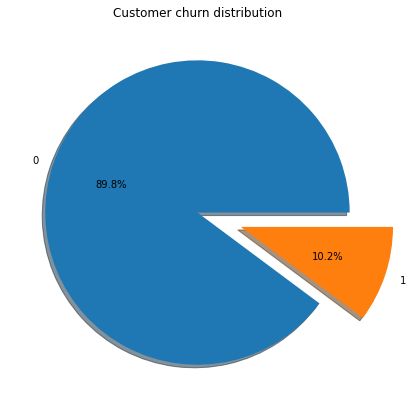

In [20]:
# churn vs no churn

plt.figure(figsize=(20,7), facecolor='white')
plt.pie(train_data.churn_probability.value_counts(), labels=train_data.churn_probability.value_counts().index.tolist(),
        explode=[0,0.3], autopct='%.1f%%', shadow=True) 
plt.title('Customer churn distribution')
plt.show()

In [21]:
# here data has class imbalance problem, hence SMOTE needs to be applied
